### Two Stream Instability
Simulated in quasi-2D with only one cell in y-axis.

The only difference between stable and unstable setup is the number density of electrons (in essence, the weights of macro-particles). The physical constants are redefined so that ε0 = 1 F/m, and c0 = 1 m/s. 

In [92]:
using PyPlot
using PyCall
ov = pyimport("openpmd_viewer")
ts = ov.OpenPMDTimeSeries("/tmp/ts/hdf5")
nothing

In [93]:
rcParams = PyDict(matplotlib["rcParams"])
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Routed Gothic"
rcParams["font.size"] = 15
rcParams["axes.linewidth"] = 1
rcParams["scatter.marker"] = "o"
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"
nothing

In [94]:
_, metadata = ts.get_field("phi")
Lx, Ly = metadata.ymax, metadata.xmax
dx, dy = metadata.dy, metadata.dx
xs, ys = metadata.y, metadata.x
nx, ny = length(xs), length(ys)
e  = ts.get_particle(["id"], "e-")
np = length(e[1])
nothing

In [95]:
pt = ov.ParticleTracker(ts, iteration=1, select=Dict("id"=>[0, np]),
    species="e-", preserve_particle_index=false)
it, np = length(ts.iterations), pt.N_selected;
px = zeros(it, np)
py = zeros(it, np)
vx = zeros(it, np)
vy = zeros(it, np)
Ex = zeros(it, ny, nx)
phi = zeros(it, ny, nx)
rho = zeros(it, ny, nx)
nHe = zeros(it, ny, nx)
ne  = zeros(it, ny, nx)
nothing

In [96]:
using ProgressMeter
@showprogress for i=1:it
    x, y, ux, uy = ts.get_particle( ["x", "y", "ux", "uy"],
        select=pt, iteration=ts.iterations[i], species="e-")
    px[i, :] = x[:]
    py[i, :] = y[:]
    vx[i, :] = ux[:]
    vy[i, :] = uy[:]
    Ex[i, :, :],= ts.get_field("E", iteration=ts.iterations[i], coord="x")
   phi[i, :, :],= ts.get_field("phi", iteration=ts.iterations[i])
   rho[i, :, :],= ts.get_field("rho", iteration=ts.iterations[i])
   nHe[i, :, :],= ts.get_field("nHe+", iteration=ts.iterations[i])
    ne[i, :, :],= ts.get_field("ne-", iteration=ts.iterations[i])
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:22


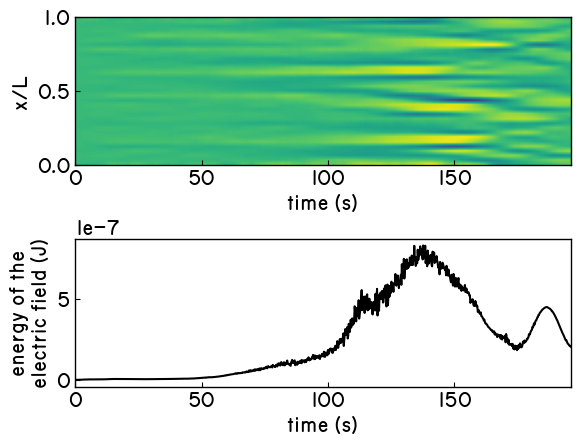

In [100]:
subplot(2,1,1)
ρ = rho[:,1,:]'
levels = range(minimum(ρ), maximum(ρ), length=128)
contourf(ts.t, xs/Lx, ρ, levels)
xlabel("time (s)")
ylabel("x/L")

subplot(2,1,2)
ε0 = 1.0
UE = 0.5ε0*dx*sum(Ex[:,1,:].^2; dims=2)
plot(ts.t, UE, "k")
xlabel("time (s)")
ylabel("energy of the\nelectric field (J)")
margins(x=0.0)
subplots_adjust(hspace=0.5)

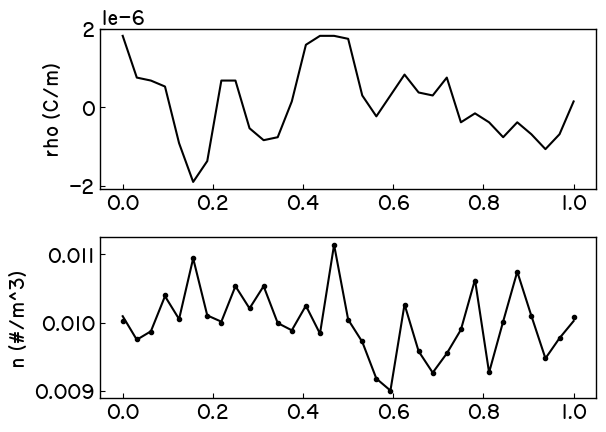

In [101]:
subplot(2,1,1); plot(xs/Lx,  Ex[1,1,:], "k-"); ylabel("rho (C/m)")
subplot(2,1,2); plot(xs/Lx,  ne[1,1,:], "k.",
                     xs/Lx, nHe[1,1,:], "k-"); ylabel("n (#/m^3)")
subplots_adjust(wspace=0.0, hspace=0.3)

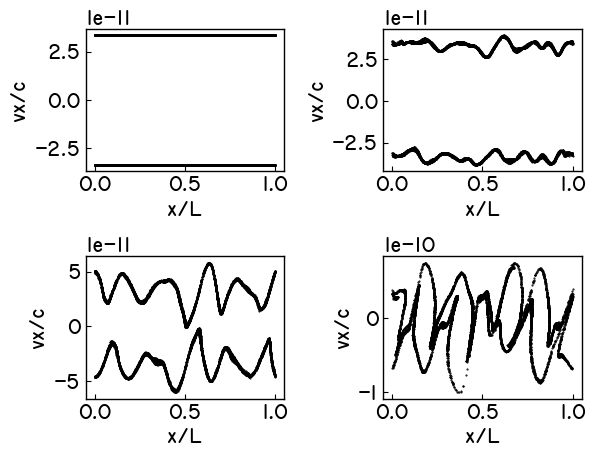

In [102]:
subplot(2,2,1); plot(px[  1,:]/Lx, vx[  1,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c");# ylim(-5e-11, +5e-11); title("t=0 fs");
subplot(2,2,2); plot(px[200,:]/Lx, vx[200,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c"); #ylim(-5e-11, +5e-11); title("t=105 fs");
subplot(2,2,3); plot(px[500,:]/Lx, vx[500,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c");# ylim(-5e-11, +5e-11); title("t=264 fs");
subplot(2,2,4); plot(px[800,:]/Lx, vx[800,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c");# ylim(-5e-11, +5e-11); title("t=423 fs");
subplots_adjust(wspace=0.5, hspace=0.6)

### Solve problem

In [1]:
PROBLEM = "ts_unstable.jl"
include("../src/iskra.jl")

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /Users/bach/.julia/packages/ProgressMeter/0ub8y/src/ProgressMeter.jl:474
Progress: 100%|█████████████████████████████████████████| Time: 0:00:30
  iteration:  1000
  e:          1280


Exporting to XDMF...
Complete!
 29.872480 seconds (271.79 M allocations: 14.208 GiB, 8.25% gc time)
